## 1. Introduction NetworkX library

Networkx is an open source library for manipulating and exploring large graphs

### Install Networkx on your computer
https://networkx.org/documentation/stable/install.html

Make sure it is well installed by executing the following command

In [1]:
import networkx as nx

### Explore some basics of the library:
- For basics commands visit: https://networkx.org/documentation/stable/tutorial.html
- Look at the gallery as well : https://networkx.org/documentation/stable/auto_examples/index.html

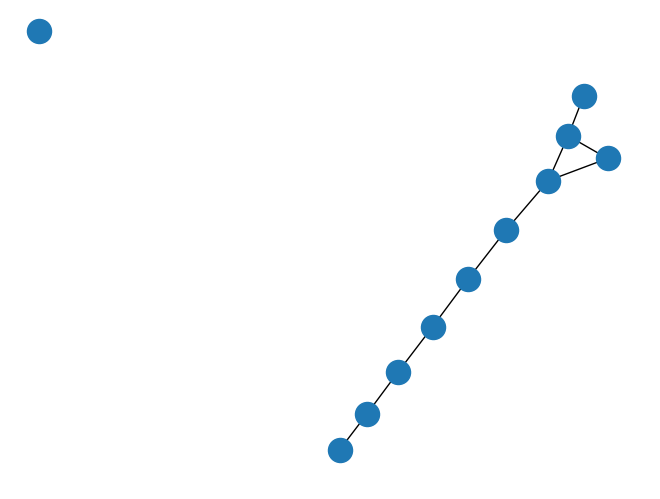

In [3]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)
nx.draw(G)

Node Clustering Coefficients:
Node 1: 1.0
Node 2: 0.6666666666666666
Node 3: 0.6666666666666666
Node 4: 0.16666666666666666
Node 5: 0
Node 6: 0


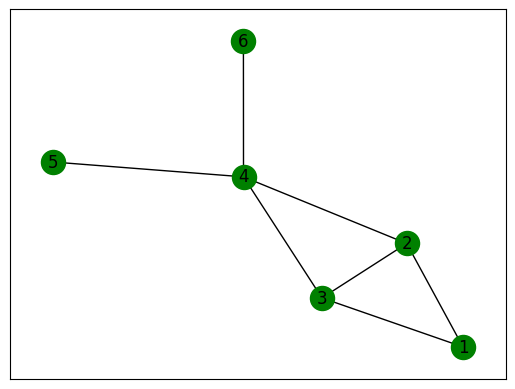

In [5]:

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5), (4, 6)])
# Calculate the clustering coefficient of each node
node_clustering = nx.clustering(G)
print("Node Clustering Coefficients:")
for node, clustering_coefficient in node_clustering.items():
   print(f"Node {node}: {clustering_coefficient}")
nx.draw_networkx(G, with_labels = True, node_color ='green')

## 2. Use NetworkX to visualize Graph properties

### Locate the random graph functions in NetworkX for the models A and B
Generate several graphs with different p and m and vizualise them

In [2]:
import  matplotlib.pyplot as plt


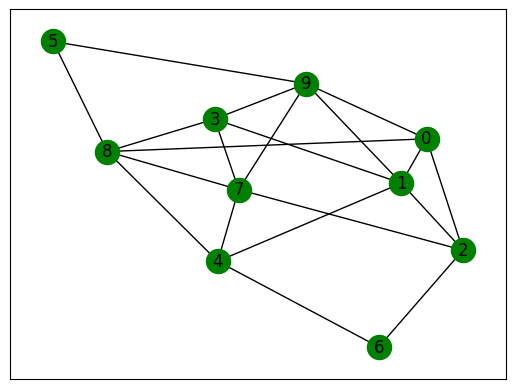

In [10]:
# Model A
n = 10  # 10 nodes
m = 20  # 20 edges
seed = 20160  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

nx.draw_networkx(G, with_labels = True, node_color ='green')

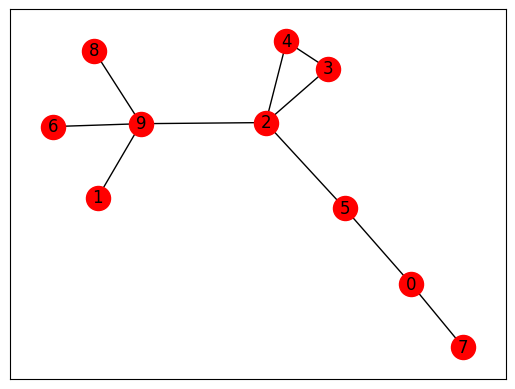

In [21]:
# Model B 

# n: nombre de nœuds, k: nombre de voisins connectés initialement, p: probabilité de réorganisation
n = 10  # Par exemple 10 nœuds
k = 2  # Chaque nœud est initialement connecté à 2 voisins proches
p = 0.5  # Probabilité de réorganisation

G_B_WS = nx.watts_strogatz_graph(n, k, p)
nx.draw_networkx(G_B_WS, with_labels = True, node_color ='red')

In [4]:
import time

Numbrr of nodes : 10
Numbrr of nodes : 100
Numbrr of nodes : 500
Numbrr of nodes : 1000
Numbrr of nodes : 2000


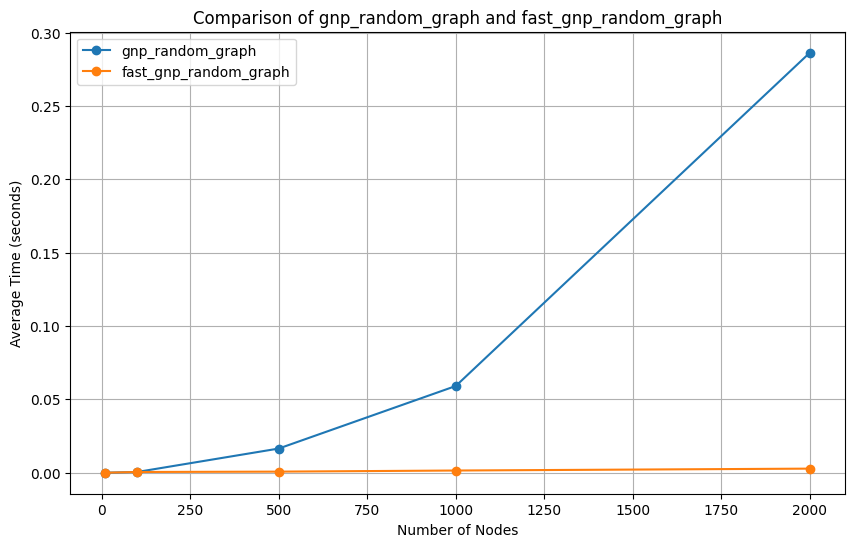

In [6]:
number_nodes = [10,100,500,1000,2000]
# Model A probability = 0.5
iterations = 4
# Stockage des temps moyens
time_gnp_random = []
time_fast_gnp_random = []

# Mesure des temps pour gnp_random_graph et fast_gnp_random_graph
for n in number_nodes:
    print(f"Numbrr of nodes : {n}" )
    probability=1/n 
    
    gnp_random_times = []
    fast_gnp_random_times = []
    
    # Répétition sur 4 itérations
    for _ in range(iterations):
        # Mesure pour gnp_random_graph
        start_time = time.time()
        nx.gnp_random_graph(n, probability)
        gnp_random_times.append(time.time() - start_time)
        
        # Mesure pour fast_gnp_random_graph
        start_time = time.time()
        nx.fast_gnp_random_graph(n, probability)
        fast_gnp_random_times.append(time.time() - start_time)
    
    # Moyenne des 4 itérations
    time_gnp_random.append(sum(gnp_random_times) / iterations)
    time_fast_gnp_random.append(sum(fast_gnp_random_times) / iterations)

# Plot des résultats
plt.figure(figsize=(10, 6))
plt.plot(number_nodes, time_gnp_random, label="gnp_random_graph", marker='o')
plt.plot(number_nodes, time_fast_gnp_random, label="fast_gnp_random_graph", marker='o')
plt.xlabel("Number of Nodes")
plt.ylabel("Average Time (seconds)")
plt.title("Comparison of gnp_random_graph and fast_gnp_random_graph")
plt.legend()
plt.grid(True)
plt.show()

### Locate the functions for the characteristics
- Connectedness
- Characteristic path length
- Clustering coefficient (Global and local)

Then check that the returned values of NetworkX correspond to what we saw by manually computing them on small graphs

### Visualize local clustering coefficients on the graphs

Read the documentation of NetworkX and try adding colors to your plotted graphs according to the local clustering coefficient of each node. The higher the clustering of a node is the darker its color

In [7]:
import matplotlib.colors as mcolors

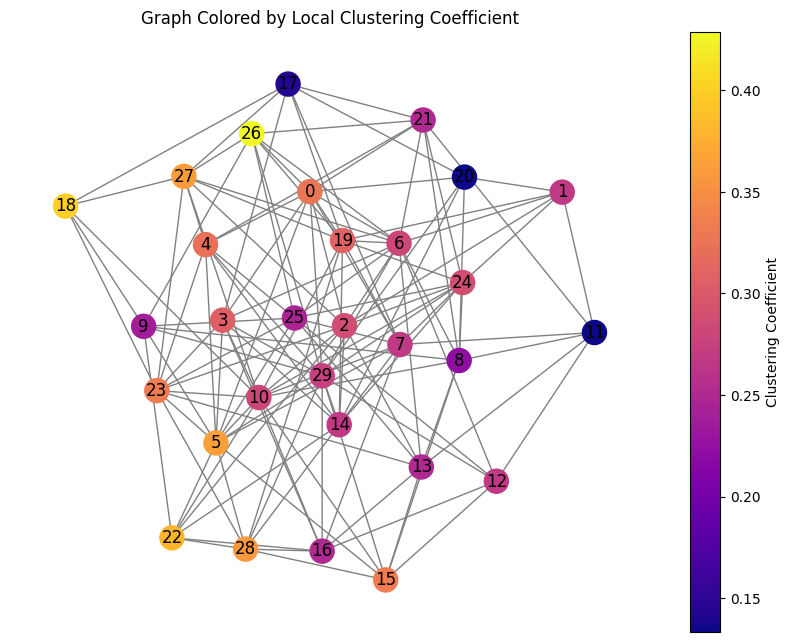

In [22]:
# Step 1: Generate a random graph
G = nx.gnp_random_graph(30, 0.3)

# Step 2: Calculate the clustering coefficients
clustering_coeffs = nx.clustering(G)

# Step 3: Normalize clustering coefficients for color mapping
# Convert clustering coefficients to a list for easier processing
coeffs = list(clustering_coeffs.values())

# Normalize the clustering coefficients to range [0,1] for color mapping
norm = mcolors.Normalize(vmin=min(coeffs), vmax=max(coeffs))

# Apply colormap (darker for higher clustering)
colors = plt.cm.plasma(norm(coeffs))

# Step 4: Plot the graph with node colors based on clustering
plt.figure(figsize=(8, 6))
nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.plasma, node_size=300, edge_color='gray')
plt.title("Graph Colored by Local Clustering Coefficient")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma), label="Clustering Coefficient")
plt.show()

### Checking Convergence of characteristics
By setting $p = c/n$ in Model B for some fixed $c$ (you can try with $1,2$ and $3$), and taking graphs with $n \rightarrow \infty$ check the convergence of 
- Average node degree
- Characteristic path length
- Global clustering coefficient

By plotting the values of these parameters divided by the theoretically expected result. X-axis represent evolution of number of nodes and Y-axis the observed characteristic divided by the theoretical result (on slide summary). You will need to compute the average degree.

Generate several graphs for each $n$ so that you can average the value of the parameter.

### Phase transitions
take $c=1$, $c = log(n)/2$, $c=log(n)$ and $c=2 log(n)$. For each value of $c$ and for $n \rightarrow \infty$, generate several graphs of size $n$ and plot the average connectedness rate.

For which values of $c$ is the graph almost surely connected?

## 3. Implement Random generators for bipartite graphs

### Bipartite Graph:
A bipartite graph is graph $G = (V_1,V_2,E)$, where $V_1$ and $V_2$ are two sets of nodes and $\forall \{u,v\} \in E,$ either $u \in V_1, v \in V_2$ or $u \in V_2, v \in V_1$

In other words edges always go from a set of nodes to the other and we never have an edge between two nodes of the same set

### Implement the function  gnp\_bipartite(n1,n2,p)  
returning a random NetworkX graph that is bipartite where each edge has probability $p$

### Implement the function  gnm\_bipartite(n1,n2,m) 
returning a uniform random NetworkX graph that is bipartite with $m$ edges

### Bipartite plotting
Use the multipartite layout of NetworkX to visialize the generated graphs

### Implementing fast algorithm for bipartite graphs
- Read the introduction and Section A of the paper https://journals.aps.org/pre/pdf/10.1103/PhysRevE.71.036113
- The authors describe a fast algorithm for generating $G(n,p)$ graphs
- The authors also describe how to extend Algorithm 1 for generating bipartite graphs

Extend Algorithm 1 to generate bipartite graphs

## 4. Graphs with fixed degree sequence

- Read NetworkX documentation on Random generators of graphs with fixed degree sequence
- Take the degree sequence $(2,2,1,1)$. How many different multigraphs can it generate?

Keeping the same degree sequence.
- Find the NetworkX function generating fixed degree graphs with the Matching Method and generate 1000 multigraphs. Then make a plot of points where each point (x,y) x corresponds to a multigraph and y its rate of appearance in the sampling.
- What do you observe? What is the probability of obtaining a simple graph?
- Is the sampling uniform over all multigraphs? Is it uniform among simple graphs?

- Notice that not all degree sequences are realizable in terms of giving rise to simple graph. Can you give an example?

- Implement a random generator of bipartite graphs with a fixed degree sequence, now you have two sequences of degrees one for each group of nodes.
- Implement a generator based on the matching method to generate a random bipartite matching